Machine learning assignment
===================
Covid-19 Outbreak Prediction

Dataset: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

Objective:
-to predict the spread of corona virus across the region for China, US and Malaysia
-to analyses the growth rates and types of mitigation applied based on China, US and Malaysia


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels as sm
from sklearn.impute import SimpleImputer
sns.set()
%matplotlib inline
pd.options.plotting.backend
pd.plotting.register_matplotlib_converters()


Data cleaning
===========

In this part of notebook, I take csv files covid_19_data

Clean data from covid_19_data.csv file and only select region for China, US and Malaysia

In [2]:
covid = pd.read_csv('C:/Users/User/WQD7006/WQD7006-Machine-Learning/Data/covid_19_data.csv')

In [3]:
#see data 
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
# data information
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              172480 non-null  int64  
 1   ObservationDate  172480 non-null  object 
 2   Province/State   124597 non-null  object 
 3   Country/Region   172480 non-null  object 
 4   Last Update      172480 non-null  object 
 5   Confirmed        172480 non-null  float64
 6   Deaths           172480 non-null  float64
 7   Recovered        172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [5]:
# check if there exist a missing value
mis = covid.isnull().sum()
mis[mis>0]

Province/State    47883
dtype: int64

In [6]:
#Only Province/State have a missing value. I can impute it because this variable is necessary for visualizing a data.

imputer = SimpleImputer(strategy='constant')#here I use constant because I cannot put another Province/State
#that we do not know or that does not correspond to his country/region  
impute_covid = pd.DataFrame(imputer.fit_transform(covid), columns=covid.columns)

In [7]:
#convert ObservationDate and Last Update object to datetime
#convert confirmed, recovered, death to numeric
impute_covid['ObservationDate'] = pd.to_datetime(impute_covid['ObservationDate'])
impute_covid['Last Update'] = pd.to_datetime(impute_covid['Last Update'])
impute_covid['Confirmed'] = pd.to_numeric(impute_covid['Confirmed'], errors='coerce')
impute_covid['Recovered'] = pd.to_numeric(impute_covid['Recovered'], errors='coerce')
impute_covid['Deaths'] = pd.to_numeric(impute_covid['Deaths'], errors='coerce')


In [8]:
#check
#impute_covid.to_csv('C:/Users/User/WQD7006/WQD7006-Machine-Learning/Data/covid_19_data_clean.csv', index=False)
impute_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              172480 non-null  object        
 1   ObservationDate  172480 non-null  datetime64[ns]
 2   Province/State   172480 non-null  object        
 3   Country/Region   172480 non-null  object        
 4   Last Update      172480 non-null  datetime64[ns]
 5   Confirmed        172480 non-null  float64       
 6   Deaths           172480 non-null  float64       
 7   Recovered        172480 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 10.5+ MB


we are finishing data cleaning

Feature Statistics and Visualization
impute_covid: we are going to visualize this data and make some statistics to find the relevant information.

In [9]:
# see again data table
impute_covid.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0


In [10]:
# we compute the active_confirmed
impute_covid['active_confirmed'] = impute_covid['Confirmed'].values - \
(impute_covid['Deaths'].values+impute_covid['Recovered'].values)

In [11]:
#check if all is ok
impute_covid.isnull().sum()[impute_covid.isnull().sum()>0]

Series([], dtype: int64)

In [12]:
#ok we have no problem see table data
impute_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SNo               172480 non-null  object        
 1   ObservationDate   172480 non-null  datetime64[ns]
 2   Province/State    172480 non-null  object        
 3   Country/Region    172480 non-null  object        
 4   Last Update       172480 non-null  datetime64[ns]
 5   Confirmed         172480 non-null  float64       
 6   Deaths            172480 non-null  float64       
 7   Recovered         172480 non-null  float64       
 8   active_confirmed  172480 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 11.8+ MB


Objective 1
==========
 -to predict the spread of corona virus across the region for China, US and Malaysia

Part 1: We will see how the covids has been spread throughout Province/State in the China, US and Malaysia from Early 2020 to December 2020.

China
=====
In this part we will extract or only filter for the China country. 

In [13]:
china = impute_covid[impute_covid['Country/Region'] == 'Mainland China']
chstar_date = china.ObservationDate.min()
chend_date = china.ObservationDate.max()
print('Novel covid-19 China:\n start date = {}\n end date = {}'.format(chstar_date, chend_date))


Novel covid-19 China:
 start date = 2020-01-22 00:00:00
 end date = 2020-12-06 00:00:00


In [14]:
lastChina = china[china['ObservationDate'] == chend_date]
lastChina.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
171912,171913,2020-12-06,Anhui,Mainland China,2020-12-07 05:26:14,992.0,6.0,986.0,0.0
171946,171947,2020-12-06,Beijing,Mainland China,2020-12-07 05:26:14,952.0,9.0,939.0,4.0
171996,171997,2020-12-06,Chongqing,Mainland China,2020-12-07 05:26:14,590.0,6.0,583.0,1.0
172038,172039,2020-12-06,Fujian,Mainland China,2020-12-07 05:26:14,500.0,1.0,453.0,46.0
172043,172044,2020-12-06,Gansu,Mainland China,2020-12-07 05:26:14,182.0,2.0,180.0,0.0


In [15]:
print('================ China report ===================================')
print('== Information to {} on novel COVID-19 =========\n'.format(chend_date))
print('Tota confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
lastChina.Confirmed.sum(), lastChina.Deaths.sum(), lastChina.Recovered.sum(), lastChina.active_confirmed.sum()))
print('==================================================================')


================ China report ===================================
== Information to 2020-12-06 00:00:00 on novel COVID-19 =========

Tota confirmed: 86634.0
Total Deaths: 4634.0
Total Recovered: 81718.0
Total active confirmed: 282.0



In [16]:
lastChina[['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].style.\
background_gradient(cmap='viridis')

,Province/State,Confirmed,Deaths,Recovered,active_confirmed
171912,Anhui,992.000000,6.000000,986.000000,0.000000
171946,Beijing,952.000000,9.000000,939.000000,4.000000
171996,Chongqing,590.000000,6.000000,583.000000,1.000000
172038,Fujian,500.000000,1.000000,453.000000,46.000000
172043,Gansu,182.000000,2.000000,180.000000,0.000000
172061,Guangdong,2004.000000,8.000000,1960.000000,36.000000
172062,Guangxi,263.000000,2.000000,260.000000,1.000000
172065,Guizhou,147.000000,2.000000,145.000000,0.000000
172068,Hainan,171.000000,6.000000,165.000000,0.000000
172074,Hebei,373.000000,6.000000,367.000000,0.000000


United State
============

In this part we will extract or only filter for the US country.

In [17]:
us = impute_covid[impute_covid['Country/Region'] == 'US']
usstar_date = us.ObservationDate.min()
usend_date = us.ObservationDate.max()
print('Novel covid-19 US:\n start date = {}\n end date = {}'.format(usstar_date, usend_date))

Novel covid-19 US:
 start date = 2020-01-22 00:00:00
 end date = 2020-12-06 00:00:00


In [18]:
lastUs = us[us['ObservationDate'] == usend_date]
lastUs.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
171896,171897,2020-12-06,Alabama,US,2020-12-07 05:26:14,269877.0,3889.0,0.0,265988.0
171898,171899,2020-12-06,Alaska,US,2020-12-07 05:26:14,37036.0,143.0,0.0,36893.0
171923,171924,2020-12-06,Arizona,US,2020-12-07 05:26:14,364276.0,6950.0,0.0,357326.0
171924,171925,2020-12-06,Arkansas,US,2020-12-07 05:26:14,170924.0,2660.0,0.0,168264.0
171967,171968,2020-12-06,California,US,2020-12-07 05:26:14,1366673.0,19928.0,0.0,1346745.0


In [19]:
print('================ US report ===================================')
print('== Information to {} on novel COVID-19 =========\n'.format(usend_date))
print('Total confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
lastUs.Confirmed.sum(), lastUs.Deaths.sum(), lastUs.Recovered.sum(), lastUs.active_confirmed.sum()))
print('==================================================================')

================ US report ===================================
== Information to 2020-12-06 00:00:00 on novel COVID-19 =========

Total confirmed: 14757000.0
Total Deaths: 282299.0
Total Recovered: 5624444.0
Total active confirmed: 8850257.0



In [20]:
lastUs[['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].style.\
background_gradient(cmap='viridis')

,Province/State,Confirmed,Deaths,Recovered,active_confirmed
171896,Alabama,269877.000000,3889.000000,0.000000,265988.000000
171898,Alaska,37036.000000,143.000000,0.000000,36893.000000
171923,Arizona,364276.000000,6950.000000,0.000000,357326.000000
171924,Arkansas,170924.000000,2660.000000,0.000000,168264.000000
171967,California,1366673.000000,19928.000000,0.000000,1346745.000000
172002,Colorado,260581.000000,3356.000000,0.000000,257225.000000
172003,Connecticut,127715.000000,5146.000000,0.000000,122569.000000
172013,Delaware,39912.000000,793.000000,0.000000,39119.000000
172016,Diamond Princess cruise ship,49.000000,0.000000,0.000000,49.000000
172017,District of Columbia,23136.000000,697.000000,0.000000,22439.000000


Malaysia
========

In this part we will extract or only filter fot the Malaysia country.

In [21]:
my = impute_covid[impute_covid['Country/Region'] == 'Malaysia']
mystar_date = my.ObservationDate.min()
myend_date = my.ObservationDate.max()
print('Novel covid-19 Malaysia:\n start date = {}\n end date = {}'.format(mystar_date, myend_date))

Novel covid-19 Malaysia:
 start date = 2020-01-23 00:00:00
 end date = 2020-12-06 00:00:00


In [22]:
lastMy = my[my['ObservationDate'] == myend_date]
lastMy.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
171815,171816,2020-12-06,missing_value,Malaysia,2020-12-07 05:26:14,72694.0,382.0,61273.0,11039.0


In [23]:
print('================ Malaysia report ===================================')
print('== Information to {} on novel COVID-19 =========\n'.format(myend_date))
print('Total confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
lastMy.Confirmed.sum(), lastMy.Deaths.sum(), lastMy.Recovered.sum(), lastMy.active_confirmed.sum()))
print('==================================================================')


================ Malaysia report ===================================
== Information to 2020-12-06 00:00:00 on novel COVID-19 =========

Total confirmed: 72694.0
Total Deaths: 382.0
Total Recovered: 61273.0
Total active confirmed: 11039.0



In [24]:
lastMy[['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].style.\
background_gradient(cmap='viridis')

,Province/State,Confirmed,Deaths,Recovered,active_confirmed
171815,missing_value,72694.000000,382.000000,61273.000000,11039.000000


In [25]:
#Combining data of these three countries into a single csv file:results.csv
frames=[china,us,my]
result = pd.concat(frames)
result.to_csv('C:/Users/User/WQD7006/WQD7006-Machine-Learning/Data/results.csv')

frames_usMy=[us,my]
result_us_my=pd.concat(frames_usMy)

frames_ChinaMy = [china,my]
result_china_My = pd.concat(frames_ChinaMy)

frames_ChinaUS = [china,us]
result_china_US = pd.concat(frames_ChinaUS)

Plotting graph between Observation Date and Confirmed for the 3 Selected Cuntries and visualizing a countrywise comparision

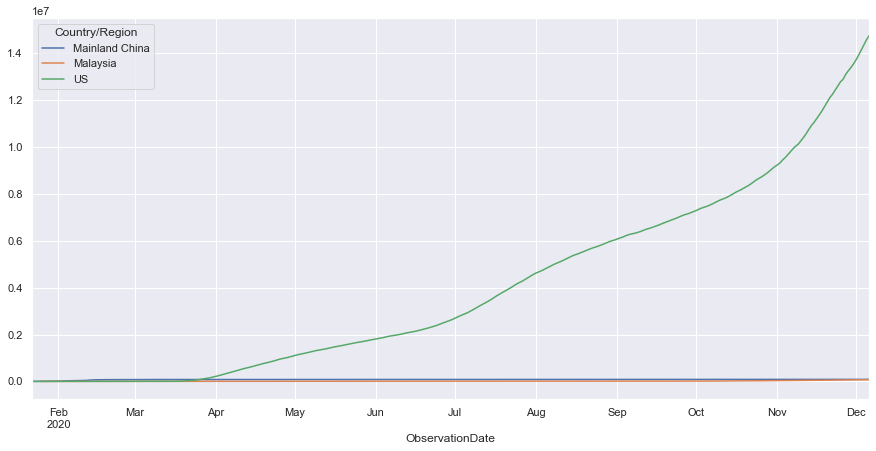

In [26]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig,ax = plt.subplots( figsize=(15,7), sharey=True)
result.groupby(['ObservationDate','Country/Region']).sum()['Confirmed'].unstack().plot(ax=ax)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))

As we can see from Apr up to Dec, China have a rapid increasing of confirmed case instead of US and Malaysia based on the graph above. We have seen qualitatively, how the COViD-19 is spreading in this 3 country.
So, Confirmed feature is an important feature in this data. we can make a model based only on that feature. Confirmed feature depend on time.

Part 2 : Deep learning GRU for predicting the spreading of novel covid-19 in China, US and Malaysia data

In [33]:
#!pip install tensorflow==2.0.0 --user
#!pip install keras

In [40]:
from sklearn.preprocessing import MinMaxScaler
import datetime
from keras.layers.recurrent import GRU
from keras.layers import Dense, Input, Dropout 
from keras.optimizers import Adam, rmsprop
from keras.models import Model 
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [42]:
confirmed_case = result[['ObservationDate', 'Confirmed']]
confirmed_case = confirmed_case.set_index('ObservationDate')
confirmed_case.head(3)

,Confirmed
ObservationDate,
2020-01-22,1.0
2020-01-22,14.0
2020-01-22,6.0


In [111]:
confirmed_case = china[['ObservationDate', 'Confirmed']]
confirmed_case = confirmed_case.set_index('ObservationDate')
confirmed_case.head(3)

,Confirmed
ObservationDate,
2020-01-22,1.0
2020-01-22,14.0
2020-01-22,6.0


In [112]:
scaler = MinMaxScaler(feature_range=(0,1))
confirmed_case['scaled_cases']= scaler.fit_transform(np.array(confirmed_case.Confirmed).reshape(-1,1))
confirmed_case.head()

,Confirmed,scaled_cases
ObservationDate,,
2020-01-22,1.0,0.000015
2020-01-22,14.0,0.000205
2020-01-22,6.0,0.000088
2020-01-22,1.0,0.000015
2020-01-22,0.0,0.000000


In [113]:
start_date = result.ObservationDate.min()
end_date = result.ObservationDate.max()

#split a data in train set and test set
split_date = end_date - datetime.timedelta(days=3) + datetime.timedelta(hours=23, minutes=59,seconds=59)
train = confirmed_case[confirmed_case.index <= split_date]
test = confirmed_case[confirmed_case.index > split_date]

def makeXy(ts, nb_timesteps): 
    ''' 
    Input:  
           ts: original time series 
           nb_timesteps: number of time steps in the regressors 
    Output:  
           X: 2-D array of regressors 
           y: 1-D array of target  
    ''' 
    X = [] 
    y = [] 
    for i in range(nb_timesteps, ts.shape[0]): 
        
        X.append(list(ts.iloc[i-nb_timesteps:i])) 
        y.append(ts.iloc[i]) 
    X, y = np.array(X), np.array(y) 
    return X, y 

lookback = 2 # 3days back 
X_train, y_train = makeXy(train['scaled_cases'], lookback) 
X_test, y_test = makeXy(test['scaled_cases'], lookback) 
Xtrain = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
Xtest = X_test.reshape((X_test.shape[0], X_test.shape[1], 1)) 
n=  Xtrain.shape[1]

In [114]:
# fix random seed for reproducibility
np.random.seed(7)

#Define input layer which has shape (None, 2) and of type float32. None indicates the number of instances
input_layer = Input(shape=(n,1), dtype='float32')
gru_layer1 = GRU(64, input_shape=(n,1), return_sequences=True)(input_layer)
gru_layer2 = GRU(32, input_shape=(n,64), return_sequences=False)(gru_layer1)
dropout_layer = Dropout(0.2)(gru_layer2)

#Finally the output layer gives prediction for the next day's confirmed case.
output_layer = Dense(1, activation='linear')(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 2, 1)              0         
_________________________________________________________________
gru_13 (GRU)                 (None, 2, 64)             12672     
_________________________________________________________________
gru_14 (GRU)                 (None, 32)                9312      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 22,017
Trainable params: 22,017
Non-trainable params: 0
_________________________________________________________________


In [115]:
history = model.fit(x=Xtrain, y=y_train, batch_size=32, epochs=20,verbose=1, validation_data=(Xtest, y_test))

Train on 9823 samples, validate on 91 samples
Epoch 1/20
9823/9823 [==============================] - 3s 304us/step - loss: 0.0286 - val_loss: 0.0314
Epoch 2/20
9823/9823 [==============================] - 2s 156us/step - loss: 0.0286 - val_loss: 0.0318
Epoch 3/20
9823/9823 [==============================] - 1s 145us/step - loss: 0.0286 - val_loss: 0.0317
Epoch 4/20
9823/9823 [==============================] - 1s 149us/step - loss: 0.0286 - val_loss: 0.0315
Epoch 5/20
9823/9823 [==============================] - 1s 138us/step - loss: 0.0286 - val_loss: 0.0313
Epoch 6/20
9823/9823 [==============================] - 1s 137us/step - loss: 0.0285 - val_loss: 0.0310
Epoch 7/20
9823/9823 [==============================] - 1s 151us/step - loss: 0.0282 - val_loss: 0.0305
Epoch 8/20
9823/9823 [==============================] - 1s 145us/step - loss: 0.0276 - val_loss: 0.0294
Epoch 9/20
9823/9823 [==============================] - 1s 148us/step - loss: 0.0272 - val_loss: 0.0288
Epoch 10/20
9823/9

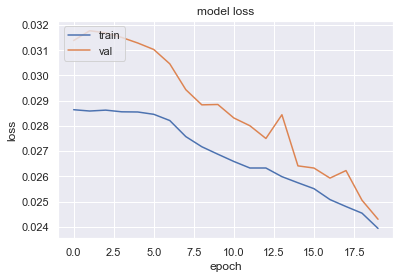

In [116]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [117]:
#we compute a prediction
preds = model.predict(Xtest)
pred_covid19 = scaler.inverse_transform(preds)
pred_covid19 = np.squeeze(pred_covid19)
from sklearn.metrics import mean_squared_error
#compute score
rmse = np.sqrt(mean_squared_error(test.Confirmed.iloc[n:] , pred_covid19))
print('RMSE for the test set:', round(rmse, 4))

RMSE for the test set: 10623.4615


In [118]:
actual_pred = pd.DataFrame()
actual_pred['actual'] = test.Confirmed.iloc[n:]
actual_pred['predict'] =  pred_covid19
valid = actual_pred.reset_index()
valid.head()

,ObservationDate,actual,predict
0,2020-12-04,590.0,10391.089844
1,2020-12-04,493.0,4177.830078
2,2020-12-04,182.0,3695.684570
3,2020-12-04,2000.0,731.031982
4,2020-12-04,263.0,3512.521973


Text(0, 0.5, ' Total confirmed')

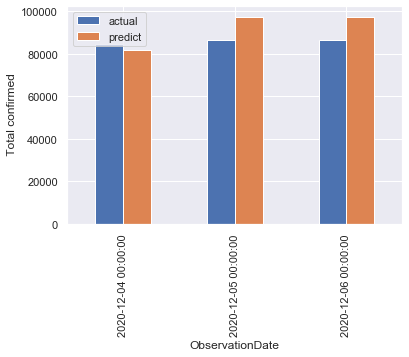

In [119]:
valid.groupby('ObservationDate').sum().plot(kind='bar')
plt.ylabel(' Total confirmed')

In [120]:
#valid.to_csv('C:/Users/User/WQD7006/WQD7006-Machine-Learning/Data/results_us.csv')
#valid.to_csv('C:/Users/User/WQD7006/WQD7006-Machine-Learning/Data/results_china.csv')

Objective 2: -to analyses the growth rates and types of mitigation applied based on China, US and Malaysia

In [146]:
#now we start to compute the ac growth rate and ratio recovered-death in china
data_china = china.groupby('ObservationDate')[['active_confirmed', 'Recovered', 'Deaths']].agg('sum')

#now we start to compute the ac growth rate and ratio recovered-death in us
data_us = us.groupby('ObservationDate')[['active_confirmed', 'Recovered', 'Deaths']].agg('sum')


#now we start to compute the ac growth rate and ratio recovered-death in Malaysia
data_my = my.groupby('ObservationDate')[['active_confirmed', 'Recovered', 'Deaths']].agg('sum')

In [147]:
def growth_rate(data=None):
    x = []
    x.append(0)
    for i in range(data.shape[0]-1):
        a = data.iloc[i+1]-data.iloc[i]
        x.append(a/data.iloc[i])
        
    return np.array(x)

C:\Users\User\anaconda3\envs\UsereEnv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in double_scalars



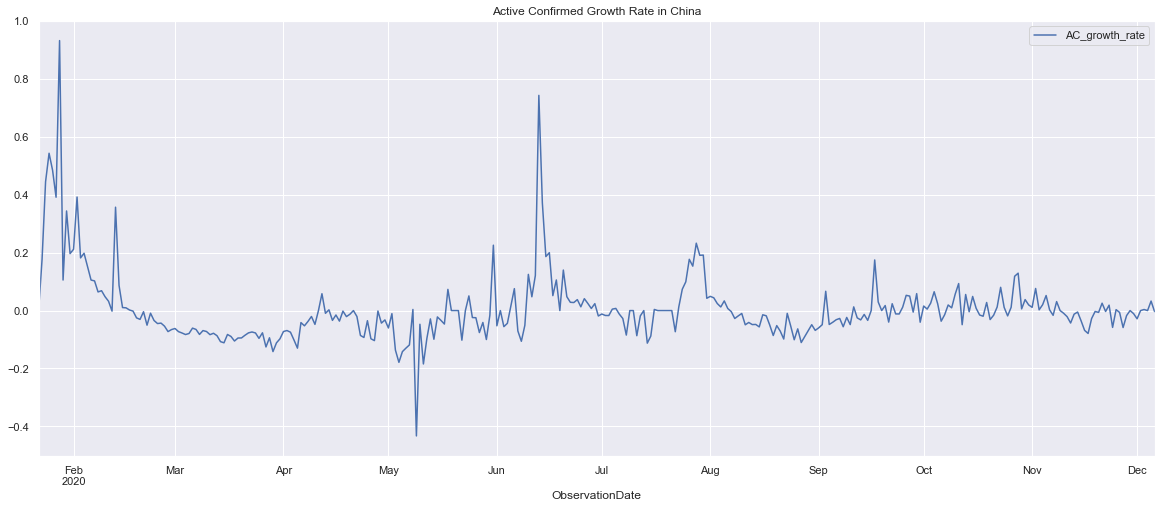

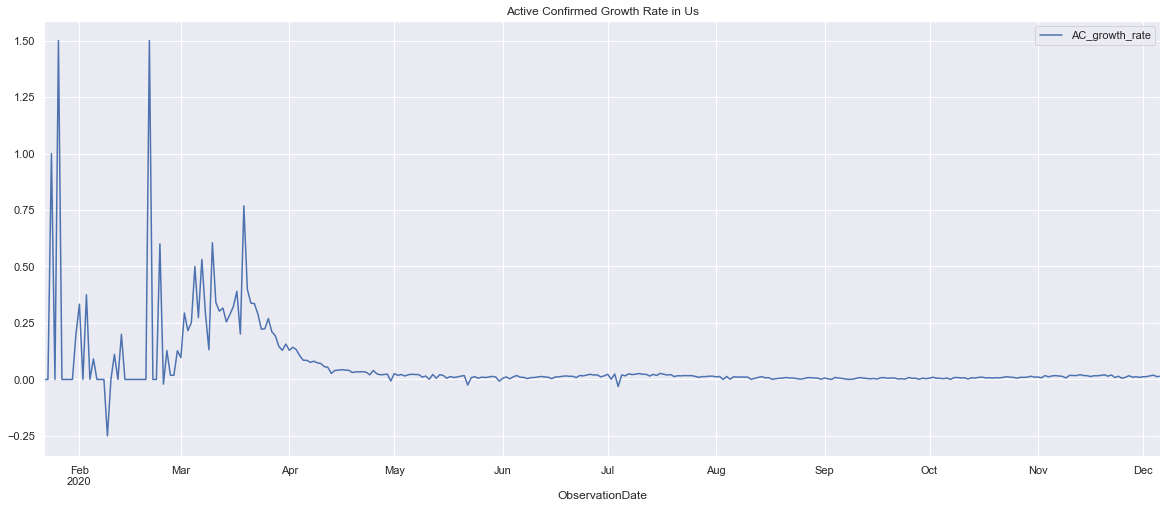

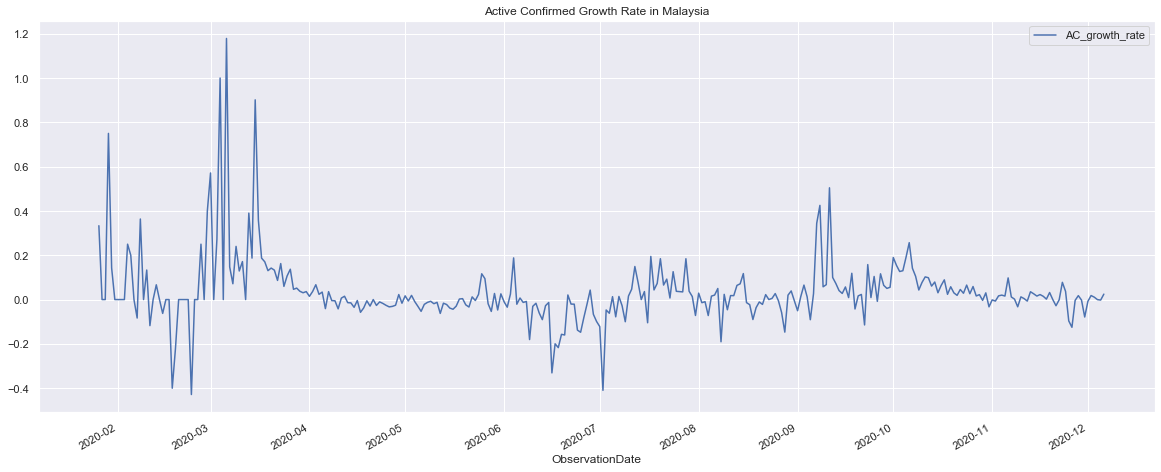

In [174]:
ac_growth_rate_china = growth_rate(data_china['active_confirmed'])
rate_china = pd.DataFrame(ac_growth_rate_china, columns=['AC_growth_rate'], index=data_china.index)
rate_china.plot(figsize=(20,8), title='Active Confirmed Growth Rate in China', label = "China")

ac_growth_rate_us = growth_rate(data_us['active_confirmed'])
rate_us = pd.DataFrame(ac_growth_rate_us, columns=['AC_growth_rate'], index=data_us.index)
rate_us.plot(figsize=(20,8), title='Active Confirmed Growth Rate in Us', label = "US")

ac_growth_rate_my = growth_rate(data_my['active_confirmed'])
rate_my = pd.DataFrame(ac_growth_rate_my, columns=['AC_growth_rate'], index=data_my.index)
rate_my.plot(figsize=(20,8), title='Active Confirmed Growth Rate in Malaysia', label = "MY")

plt.show()
plt.ylabel='Growth rate'

C:\Users\User\anaconda3\envs\UsereEnv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in double_scalars



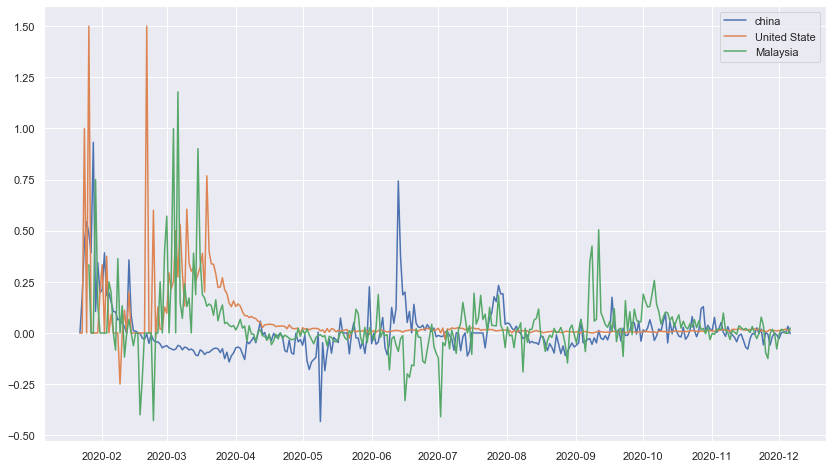

In [175]:
plt.rcParams["figure.figsize"] = (14,8)

ac_growth_rate_china = growth_rate(data_china['active_confirmed'])
rate_china = pd.DataFrame(ac_growth_rate_china, columns=['AC_growth_rate'], index=data_china.index)
plt.plot(rate_china, label="china")

ac_growth_rate_us = growth_rate(data_us['active_confirmed'])
rate_us = pd.DataFrame(ac_growth_rate_us, columns=['AC_growth_rate'], index=data_us.index)
plt.plot(rate_us, label="United State")

ac_growth_rate_my = growth_rate(data_my['active_confirmed'])
rate_my = pd.DataFrame(ac_growth_rate_my, columns=['AC_growth_rate'], index=data_my.index)
plt.plot(rate_my, label="Malaysia")

plt.ylabel='Growth rate'
plt.xlabel='Observe Date'
plt.title='Active Confirmed Growth Rate in China'
plt.legend(loc="upper right")
plt.show()

Conclusion: As you see yourself, there exist the Correlation between growth rate and types of mitigation. The eradication of covid 19 in a country depends on its policy for combating this disease and the way in which this policy is implemented in immediate time and in space.

Text(0, 0.5, 'Total Confirmed observation')

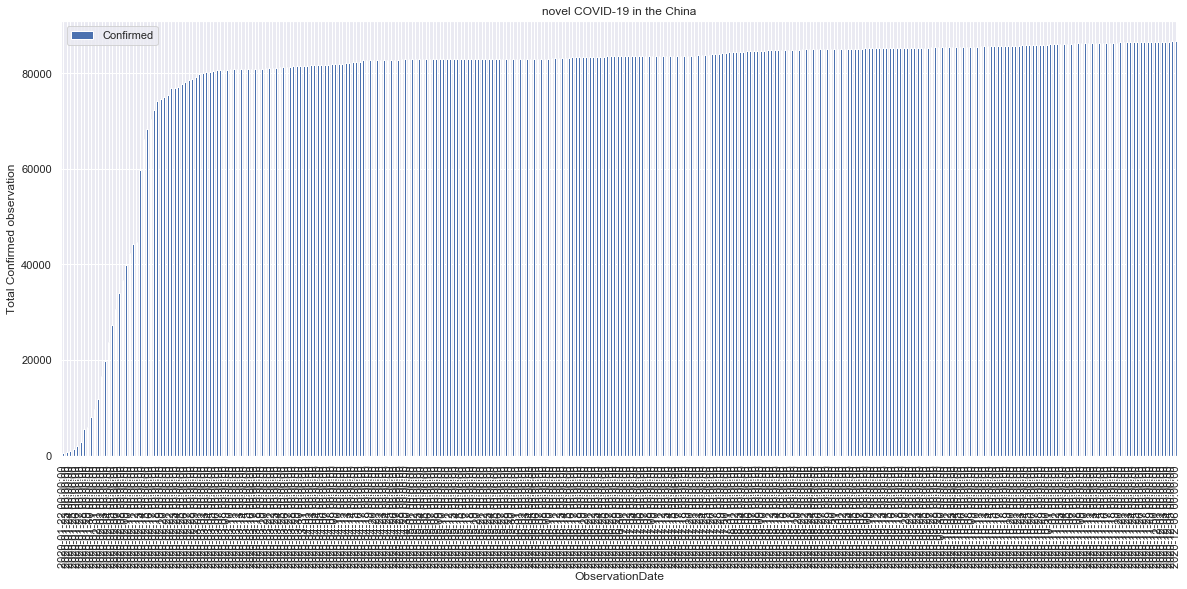

In [131]:
time_obs = china.groupby('ObservationDate')['Confirmed'].aggregate([np.sum])
time_obs.columns = ['Confirmed']
time_obs.plot(figsize=(20,8), title='novel COVID-19 in the China', kind='bar')
plt.ylabel('Total Confirmed observation')

In [132]:
#we take time_Obs see code above
time_obs.head()

,Confirmed
ObservationDate,
2020-01-22,547.0
2020-01-23,639.0
2020-01-24,916.0
2020-01-25,1399.0
2020-01-26,2062.0


In [134]:
x = []
x.append(0)
for i in range(time_obs.shape[0]-1):
    a = time_obs.iloc[i+1,0]-time_obs.iloc[i,0]
    x.append(a/time_obs.iloc[i,0])
grown_rate = time_obs.reset_index()
grown_rate['grownRate'] = x
grown_rate.head()

,ObservationDate,Confirmed,grownRate
0,2020-01-22,547.0,0.000000
1,2020-01-23,639.0,0.168190
2,2020-01-24,916.0,0.433490
3,2020-01-25,1399.0,0.527293
4,2020-01-26,2062.0,0.473910


Text(0.5, 0, '$t$')

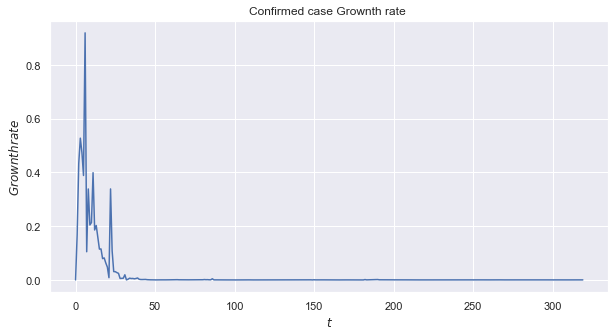

In [135]:
grown_rate.grownRate.plot(figsize=(10,5))
plt.title('Confirmed case Grownth rate ')
plt.ylabel('$Grownth rate$')
plt.xlabel('$t$')

we have determined a confirmed case grownth rate. We are going to use a model linearRegression and preprocessing our data using polynomialfeature to fit very well a nonlinear relationship.

In [125]:
#pip install xgboost

In [126]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor # for next model below
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

trend_model = make_pipeline(PolynomialFeatures(8), LinearRegression(normalize=True, fit_intercept=True))
trend_model.fit(np.array(grown_rate.index).reshape((-1,1)), grown_rate['grownRate'])

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=8, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

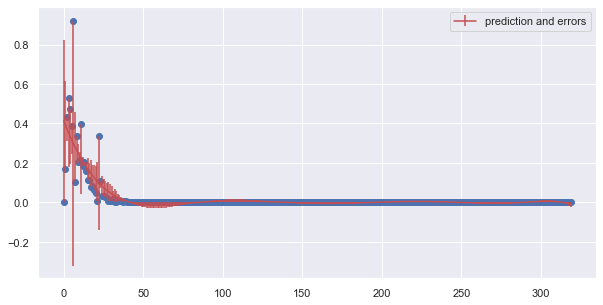

In [127]:
dt =np.array(grown_rate.index).reshape((-1,1)) 
fit_grown = trend_model.predict(dt)
errors = grown_rate['grownRate'] - fit_grown
upperlimits = [True, False] 
lowerlimits = [False, True] 

#plot the grownrate graph
plt.figure(figsize=(10,5))
plt.scatter(dt, grown_rate['grownRate'])
plt.errorbar(dt, fit_grown,yerr = errors,  color='r', label='prediction and errors')
plt.legend(loc='best')
plt.show()

In [128]:
#score
trend_model.score(dt, grown_rate['grownRate'])

from datetime import timedelta
next_date = str(end_date+timedelta(days=15))
new_date = pd.date_range(start=next_date, periods=3)
ndt = np.arange(len(new_date)) +len(time_obs)

# we compute a new grownth rate 
new_rate = trend_model.predict(ndt.reshape((-1,1)))

pred_rate = pd.DataFrame()
rate = grown_rate.set_index('ObservationDate')
pred_rate['prediction_grownthRate'] = new_rate 
pred_rate.index=new_date

#we concatenate the two data
data_plot = pd.concat([rate, pred_rate], sort=False)
data_plot.head(5)

,Confirmed,grownRate,prediction_grownthRate
2020-01-22,547.0,0.000000,NaN
2020-01-23,639.0,0.168190,NaN
2020-01-24,916.0,0.433490,NaN
2020-01-25,1399.0,0.527293,NaN
2020-01-26,2062.0,0.473910,NaN


Text(0.5, 1.0, 'growth rate forecast')

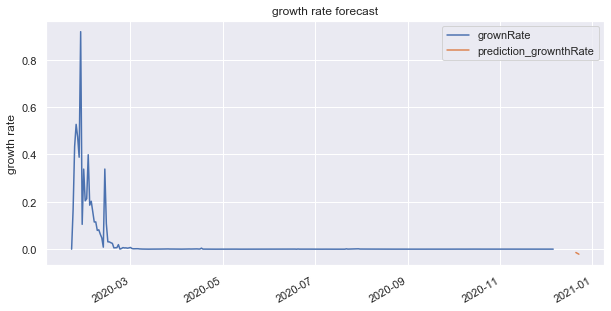

In [129]:
data_plot[['grownRate', 'prediction_grownthRate']].plot(figsize=(10,5))
plt.ylabel('growth rate')
plt.title('growth rate forecast')